## I. Preamble

In [18]:
import pandas as pd
#from datetime import datetime
from dataclasses import dataclass, asdict
import time
import numpy as np
import serial

In [19]:
import sys
sys.path.append(r"E:\00 Script\AttodryMeasurement\src")
import Atto800
import Keithley2400
import Monitor224
import AttoDrySteps
import utils

## II. Select Instruments

In [20]:
AttoDry800_Status=False,
AttoDrySteps_Status=True
Keithley2400_Status=False
Monitor224_Status=True

### Initialization 

In [21]:
### Attocube

IP = "192.168.1.1"
Atto=Atto800.Device(IP)
if AttoDry800_Status==True:
    Atto.connect()

### AttoDrySteps
AttoSteps=AttoDrySteps.AttoDrySteps

### Keithley
COM_PORT = 'COM5'   
GPIB_ADDR = 5

if Keithley2400_Status==True:
    keithley = Keithley2400.Device(COM_PORT, GPIB_ADDR)
    print("Connected to:", keithley.idn())


### Monitor 224

if Monitor224_Status==True:
    CHANNEL="a"
    Monitor=Monitor224.device(CHANNEL)

## III. Set Parameters

### Attocube

AttoSteps(AttoDrySteps_Status,
    TestMode         = 2, # 1 Erwärmung 2 Abkühlung 
    ControlMode      = 2, # 1 Sample-Plate Control 2 Sample-Plate and Cold-Plate Temperature Control
    TimeControlMode      = 1, # 1 Timestep includes the time needed for reaching a temperature(manual) 2 TimeStep aften reaching temperature (automatic)
    Temperaturen     = [5,8,9,10,20,30,40,50,60,70,80,90,100,150,200,250,275,295,300], # Test Temperaturen, the min Temperature must be possible
    TimeStep         = 3*60)  # [s]

In [22]:
AttoSteps=AttoSteps(AttoDrySteps_Status,
    TestMode             = 2, 
    ControlMode          = 2,
    TimeControlMode      = 1,
    Temperaturen         = [5,8,9,10,20,30,40,50,60,70,80,90,100,150,200,250,275,295,300],
    TimeStep             = 3*60)

### Keithley

if Keithley2400==True:
VoltageRange= [(100,1),
              (400,2)] # (Temperature in  K, Voltage Range in V)
CurrentRange =1E-3    # 1E-3 = 1 mA
VoltageCompliance= 1  # Maximum Voltage

Strom                 = [0, 0.1e-3,0.2e-3] # Set currents fot the measurement
TimeMeasurement      = 30 # Duration of the current and measurement
TimeSleepCurrent     = 60 # Waiting time to set each current [s]
SampleRate           = 1 # number of seconds per measurement [s]

### Filename and Confirmation

In [23]:
Name      ="Muster" # Short name
LogName         = f"{Name}.txt"
Designation     = f"{Name}.csv"

In [24]:
filename         = utils.setFilename(Designation)
AttoSteps.bestätigung()

2025121014_Muster.csv
The estimated time to complete the test is min 0.95 hours (Time for reaching the target temperature and measurement time not considered)
The measurement will be carried out during the cooling down
The following temperatures will be set (in this order) [300, 295, 275, 250, 200, 150, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 9, 8, 5]
Both temperature of the sample plate and cold plate will be controlled. If the mode is heating up, the cold plate has to be cooled down again until 4 K after the measurement is completed.


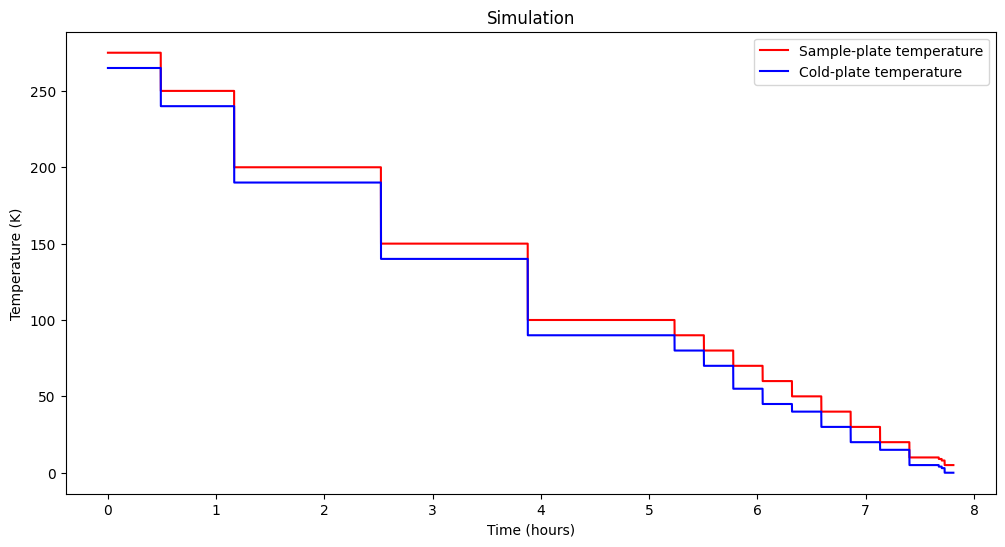

In [25]:
AttoSteps.plotSimulation()

## IV. Measurement

In [26]:
utils.startTest()

AttributeError: module 'utils' has no attribute 'startTest'

In [4]:
Atto.exchange.stopTempControl()